# Describe

In this section, I will describe the data about this project.

The database we use is *Palliative and end of life care: Patterns of care, England 2021*. It consists of 6 tables with the statistical data of the number of deaths, the number of hospital admissions, the length of hospitalisation, and the place of death for different population groups with different causes of death.

In my study, I will focus on the relationship between the length of hospitalisation and other variables. So, I will mainly use Table 4~6, which are:
- Table 4: Time spent in hospital summary statistics, by underlying cause of death and demographic characteristics, England 2021 (called 'time' in the program)
- Table 5: Time spent in hospital (any cause of death) during the final 6 months of life, England 2021 (called 'totaltime' in the program)
- Table 6: Place of death (number and percentage) by underlying cause of death and demographic characteristics, England 2021 (called 'place' in the program)

In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load data
time = pd.read_csv("4_time.csv",skiprows=3)
totaltime = pd.read_csv("5_time_all_cause.csv",skiprows=3)
place = pd.read_csv("6_place.csv",skiprows=3)

### Table 4: Time spent in hospital summary statistics

#### General describe

| Data Type | Data | Description |
| :--- | :--- | :--- |
| Object |Broad underlying cause of death | A rough classification of causes of death. |
| Object |Narrow underlying cause of death | Detailed classification of causes of death. It is broad underlying cause of death's secondary classification. |
| Object |Demographic category | A rough classification of population. |
| Object |Specific demographic group | Detailed classification of population. It is demographic category's secondary classification. |
| Object |Number of deaths | Total number of deaths. |
| Object |Time period before death | Two statistical periods: 3 months and 6 months. |
| Object |Number of people admitted | Number of hospital admissions before death. |
| Object |Total days in hopsital | If a person is admitted multiple times, they will be counted separately. |
| Int | 25th percentile | Statistical data of time spent in hospital for people with one or more admission. |
| Int | Median | Statistical data of time spent in hospital for people with one or more admission. |
| Int | 75th percentile | Statistical data of time spent in hospital for people with one or more admission. |
| Float | Percentage of people who died who were admitted | Number of people admitted / Number of deaths |
| Float | Average percentage of time spent in hospital | The average number of 'Total days in hopsital / Time period before death' |

There is one inconvenient thing about this data:
- Data 'Number of deaths' and 'Number of people admitted' are of type object because all the numbers like '15000' are presented in the form of '15,000'. This will be inconvenient for the calculation of the data.

We will make corrections as we analyse the data if needed.

In [109]:
print(time.dtypes)

Broad underlying cause of death                                                   object
Narrow underlying cause of death                                                  object
Demographic category                                                              object
Specific demographic group                                                        object
Number of deaths                                                                  object
Time period before death                                                          object
Number of people admitted                                                         object
Percentage of people who died who were admitted                                  float64
Total days in hopsital                                                            object
25th percentile: Time spent in hospital for people with one or more admission      int64
Median: Time spent in hospital for people with one or more admission               int64
75th percentile: Time

#### Summary statistics

Since the 25th percentile, median, and 75th percentile are provided in the table, it is possible to draw box plots of the length of hospital stay for each detailed cause of death and detailed ethnicity.

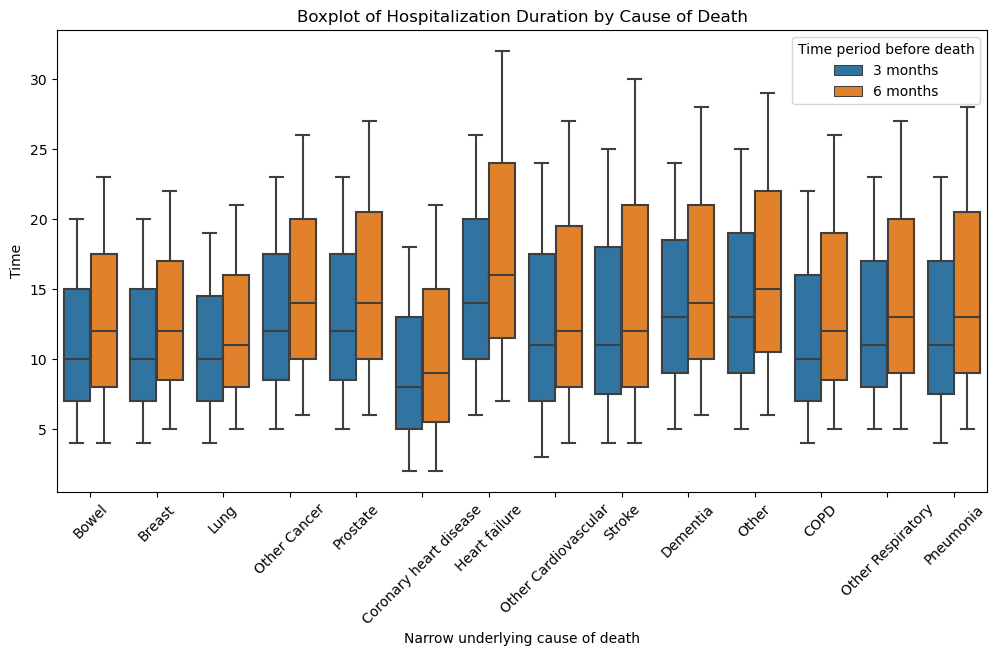

In [110]:
time.rename(columns={
    '25th percentile: Time spent in hospital for people with one or more admission': '25th percentile', 
    'Median: Time spent in hospital for people with one or more admission': 'Median',
    '75th percentile: Time spent in hospital for people with one or more admission': '75th percentile'
}, inplace=True) # The columns' names are too long

time.loc[(time['Broad underlying cause of death'] == 'Dementia') & (time['Narrow underlying cause of death'] == 'All'), 'Narrow underlying cause of death'] = 'Dementia'
time.loc[(time['Broad underlying cause of death'] == 'Other') & (time['Narrow underlying cause of death'] == 'All'), 'Narrow underlying cause of death'] = 'Other'

boxdata = time[['Narrow underlying cause of death','Specific demographic group', 'Time period before death', '25th percentile', 'Median', '75th percentile']]
time_cleaned = pd.melt(boxdata, id_vars=['Narrow underlying cause of death', 'Specific demographic group', 'Time period before death'], var_name='Data', value_name='Value')

time_clean_cause = time_cleaned[(time_cleaned['Narrow underlying cause of death'] != 'All')]
plt.figure(figsize=(12, 6))
sns.boxplot(x='Narrow underlying cause of death', y='Value', hue='Time period before death',data=time_clean_cause)
plt.xticks(rotation=45)
plt.title('Boxplot of Hospitalization Duration by Cause of Death')
plt.xlabel('Narrow underlying cause of death')
plt.ylabel('Time')
plt.show()

The x-axis is all the detailed causes of death. Y-axis is the distribution of time spent in hospital before death for those who died of this cause of death. Blue represents data for the three months prior to death. Yellow represents data for six months before death.

By plotting box plots of the length of hospitalisation for people who died from various narrow underlying causes of death, we can know that:

- Generally, the trend in the distribution of length of hospitalisation due to various causes of death was constant across different time period(3 months and 6 months).
- People with the underlying cause of death of **coronary heart disease** generally have the minimum length of hospitalisation.
- People with the underlying cause of death of **heart failure** generally have the maximum length of hospitalisation.
- Patients whose cause of death was **lung cancer** had the smallest difference in length of hospitalisation before death.
- Patients whose cause of death was **stroke** had the largest difference in length of hospitalisation before death.

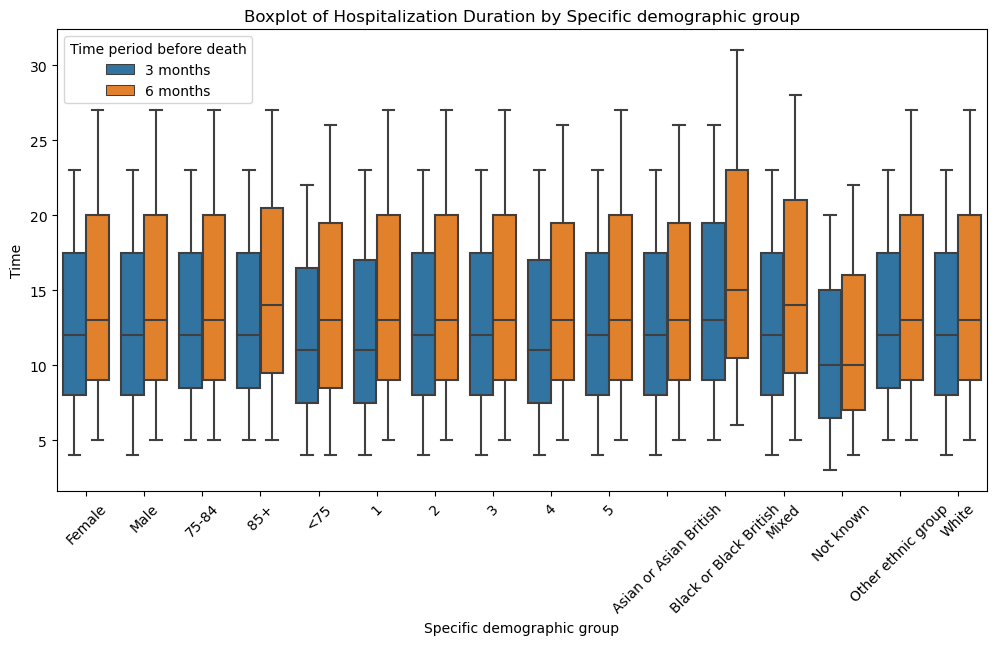

In [111]:
time_clean_demo = time_cleaned[time_cleaned['Specific demographic group'] != 'All']
plt.figure(figsize=(12, 6))
sns.boxplot(x='Specific demographic group', y='Value', hue='Time period before death',data=time_clean_demo)
plt.xticks(rotation=45)
plt.title('Boxplot of Hospitalization Duration by Specific demographic group')
plt.xlabel('Specific demographic group')
plt.ylabel('Time')
plt.show()

The x-axis shows demographic groups including: gender, age, deprivation level, ethnicity. Y-axis shows the distribution of time spent in hospital before death for this population. Blue represents data for the three months prior to death. Yellow represents data for six months before death.

By plotting box plots of the length of hospitalisation for specific demographic groups, we can know that:

- Differences in the distribution of length of hospitalisation by demographic group were generally small, but a few figures differed markedly from others.
- The **'Black or Black British'** group, along with the **'Mixed'** group spent clearly longer time in hospital before they died.
- On the contrary, the **'Not known'** group spent clearly shorter time in hospital before they died.

### Table 5: Time spent in hospital (any cause of death) during the final 6 months of life

#### General describe

| Data Type | Data | Description |
| :--- | :--- | :--- |
| Object | Number of people | Number of people whose length of hospitalisation is equal to the current data. |
| Int | Days in hospital following hospital admission | Time spent in hospital during the final 6 months of life |

We should turn the data type of 'Number of people' to 'Int' for future use.

In [112]:
print(totaltime.dtypes)

Days in hospital following hospital admission     int64
Number of people                                 object
dtype: object


#### Summary statistics

Visualise the relationship between the number of days in hospital and the number of people with a bar chart.

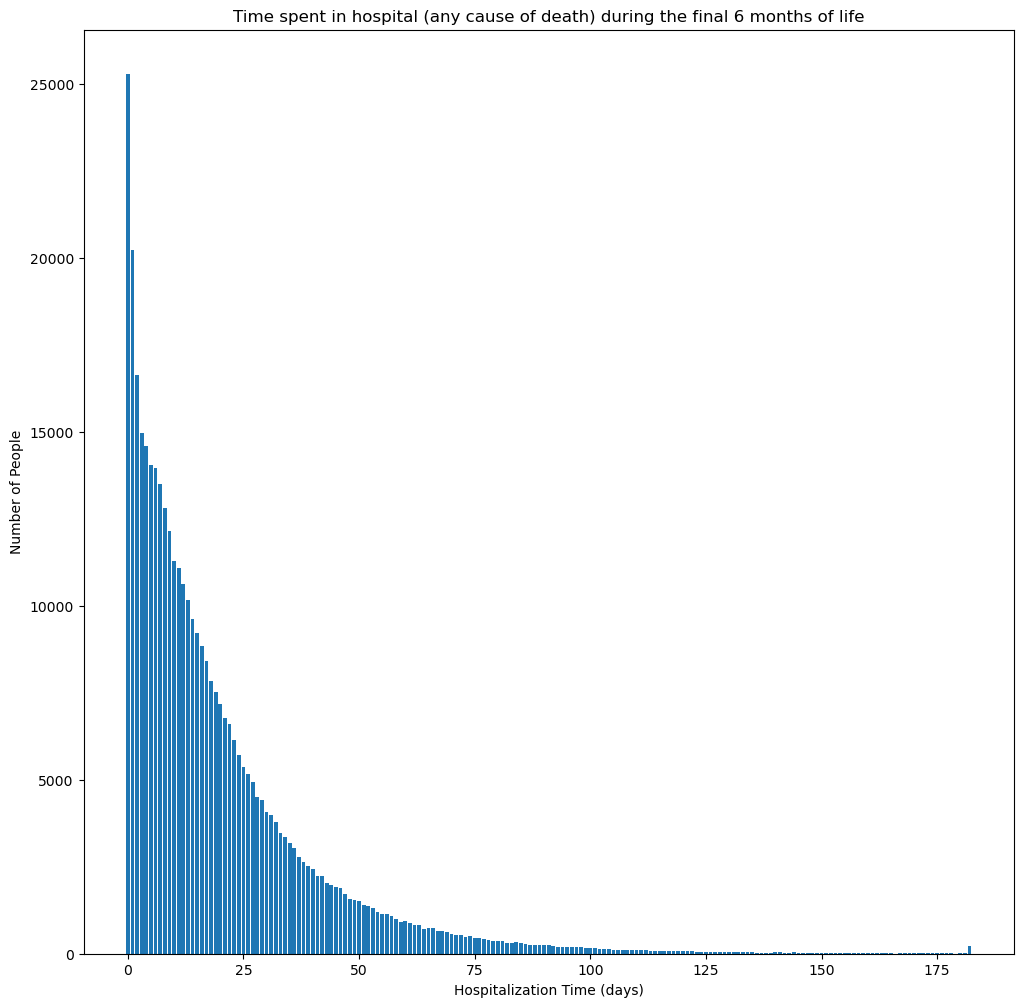

In [113]:
totaltime['Number of people'] = totaltime['Number of people'].str.replace(',', '').astype(int)

plt.figure(figsize=(12, 12))
plt.bar('Days in hospital following hospital admission', 'Number of people', data=totaltime)
plt.xlabel('Hospitalization Time (days)')
plt.ylabel('Number of People')
plt.title('Time spent in hospital (any cause of death) during the final 6 months of life')
plt.show()

The x-axis is the total number of days of hospitalisation in the six months prior to death. Y-axis is the corresponding number of people.

By plotting bar plot, we can know that:

- There is a negative correlation between the number of days of hospitalisation and the number of people.
- The largest number of people were discharged at **0** days in hospital, over 25,000.
- As the number of days in hospital increases, there is a significant increase in numbers when the number of days in hospital reaches the maximum value. This suggests that some patient had been in hospital for **more than six months** before their death.

#### Relationship

### Table 6: Place of death (number and percentage)

#### General describe

| Data Type | Data | Description |
| :--- | :--- | :--- |
| Object | Broad underlying cause of death | A rough classification of causes of death. |
| Object | Narrow underlying cause of death | Detailed classification of causes of death. It is broad underlying cause of death's secondary classification. |
| Object | Demographic category | A rough classification of population. |
| Object | Specific demographic group | Detailed classification of population. It is demographic category's secondary classification. |
| Object | Number of death | Data on the number of people with a certain cause of death/people of a certain demographic classification who died somewhere. |
| Object | Place of death | Where the patients end up dying. |
| Float | Percentage of deaths in the cause of death / demographic category | Number of death / The total death number of one kind of underlying cause of death or demographic category. |

We should turn the data type of 'Number of death' to 'Int' for future use.

#### Summary statistics

Firstly, I'm going to draw a bar chart to visualise 'Number of death' of every place of death for every narrow underlying cause of death and specific demographic group.

In [114]:
place['Number of death'] = place['Number of death'].str.replace(',', '').astype(int)

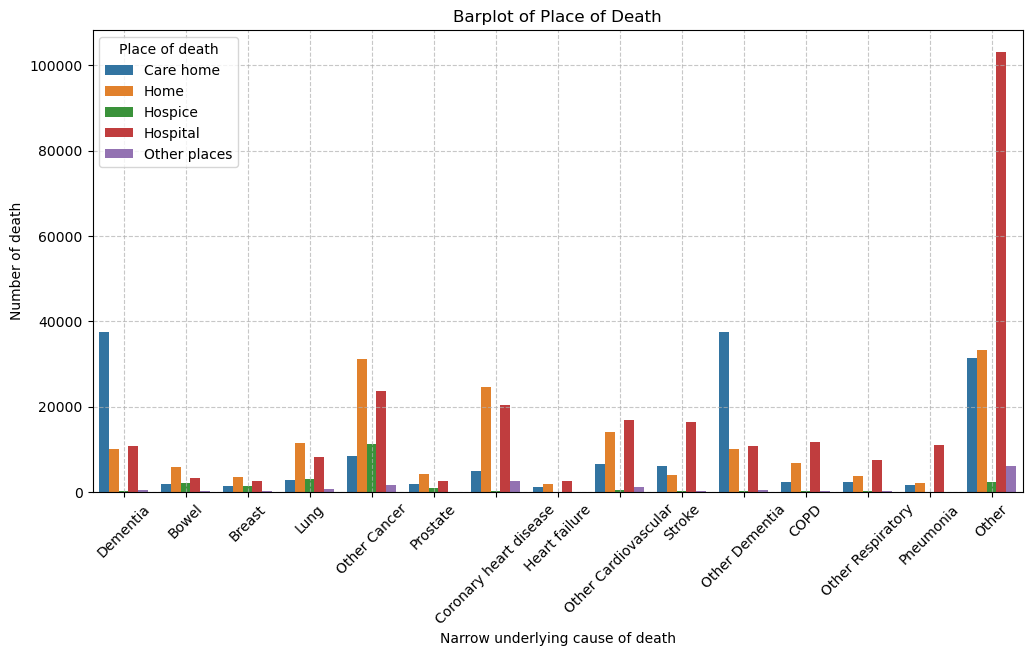

In [115]:
place.loc[(place['Broad underlying cause of death'] == 'Dementia') & (place['Narrow underlying cause of death'] == 'All'), 'Narrow underlying cause of death'] = 'Dementia'
place.loc[(place['Broad underlying cause of death'] == 'Other') & (place['Narrow underlying cause of death'] == 'All'), 'Narrow underlying cause of death'] = 'Other'

place_clean_cause = place[place['Narrow underlying cause of death'] != 'All']
plt.figure(figsize=(12, 6))
sns.barplot(x='Narrow underlying cause of death', y='Number of death', hue='Place of death', data=place_clean_cause)
plt.xticks(rotation=45)
plt.title('Barplot of Place of Death')
plt.xlabel('Narrow underlying cause of death')
plt.ylabel('Number of death')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The x-axis represents the specific cause of death, the y-axis represents the number of people who died, and different colours represent different places of death. 

In this graph, we can see that the number of people in the 'Other' group who died in hospital was particularly large.After excluding 'other',there are several values that are very high, namely **Other Cancer - Home, Other Cancer - Hospital, Coronary heart desease - Home, Coronary heart disease - Hosipital, Other Dementia - Care Home**. They all have a number of death **over 20,000**.

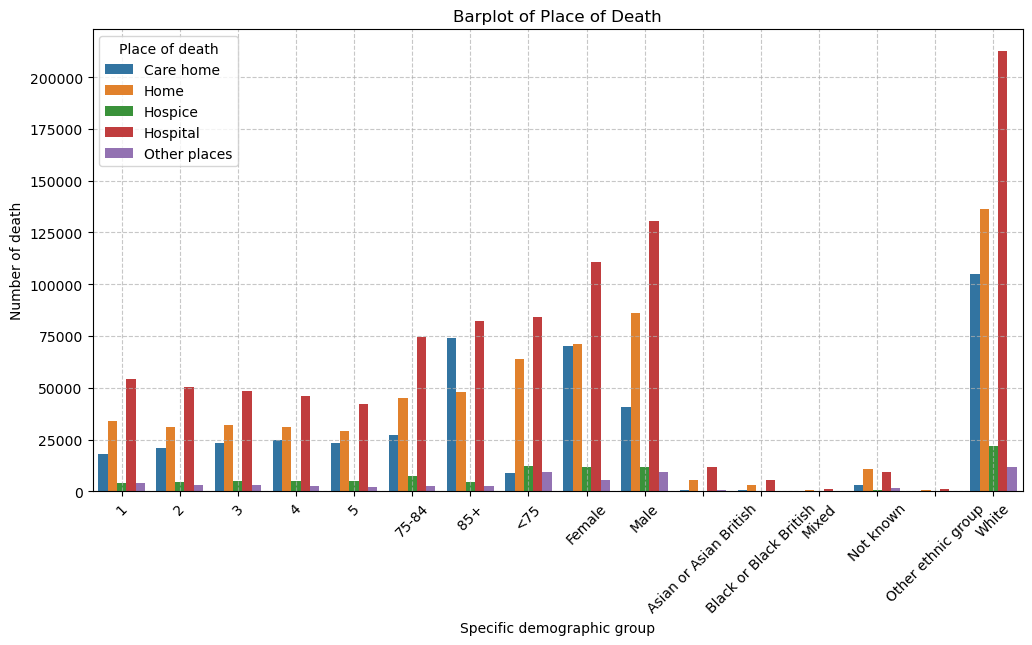

In [116]:
place_clean_demo = place[place['Specific demographic group'] != 'All']
plt.figure(figsize=(12, 6))
sns.barplot(x='Specific demographic group', y='Number of death', hue='Place of death', data=place_clean_demo)
plt.xticks(rotation=45)
plt.title('Barplot of Place of Death')
plt.xlabel('Specific demographic group')
plt.ylabel('Number of death')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

The x-axis represents the specific demographic group, the y-axis represents the number of people who died, and different colours represent different places of death. 

In this graph, we can find the highest number of **whites dying in hospitals**, and the only figure that **exceeds 200,000**. At the same time we can also find that there are some data that are surprisingly low, so it makes sense to analyse the proportion of places of death for each classification.

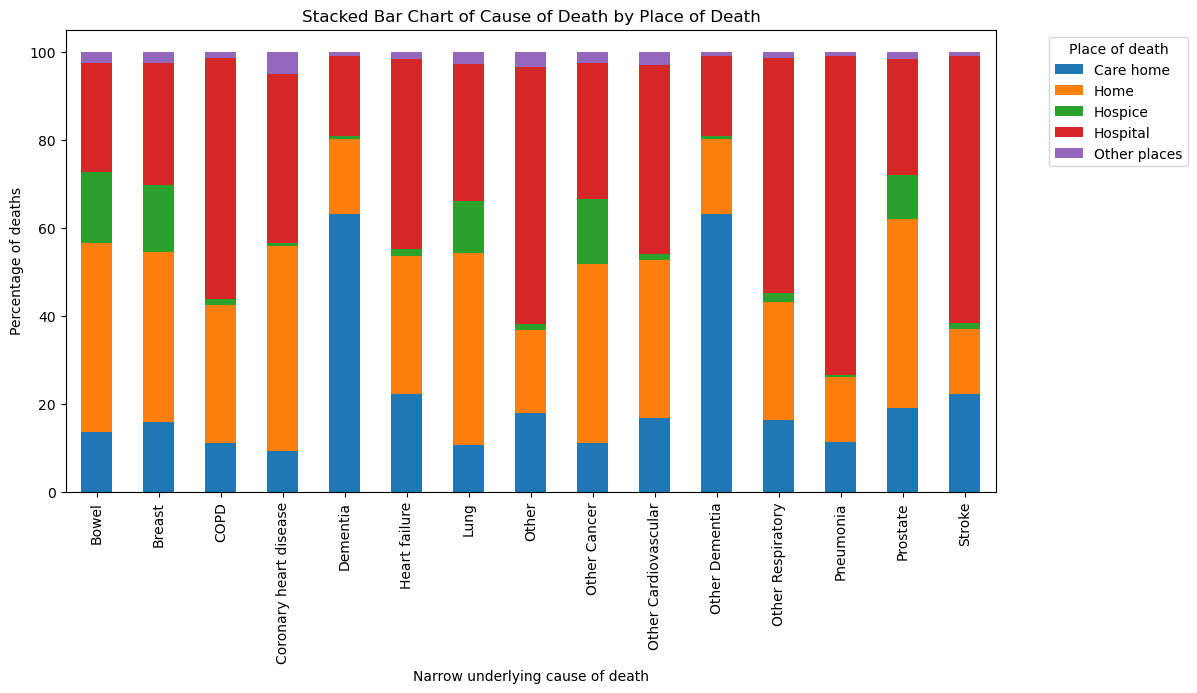

In [117]:
cleanplaceA = place[place['Narrow underlying cause of death'] != 'All']

pivot_place = cleanplaceA.pivot(index='Narrow underlying cause of death', columns='Place of death', values='Percentage of deaths in the cause of death / demographic category')

ax = pivot_place.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Stacked Bar Chart of Cause of Death by Place of Death')
plt.xlabel('Narrow underlying cause of death')
plt.ylabel('Percentage of deaths')

plt.legend(title='Place of death', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The x-axis represents the specific cause of death, the y-axis represents the percentage of deaths, and different colours represent different places of death. 

In this graph, we can know the following information:

- Excluding "Other places", the proportion of deaths occurring in **Hospice was small for all causes**.
- While most causes of death are more prevalent at home and in hospital, **"Other Dementia"** is a special case, with a particularly high proportion of deaths occurring in the **care home, at over 60%**.
- The percentage of **pheumonia** patients who die in **hospital** is the largest of all causes.
- The percentage of **coronary heart disease** patients who die in **home** is the largest of all causes.

/tmp/ipykernel_140/1202522003.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleanplaceB['Specific demographic group'] = pd.Categorical(cleanplaceB['Specific demographic group'], categories=demoorder, ordered=True)


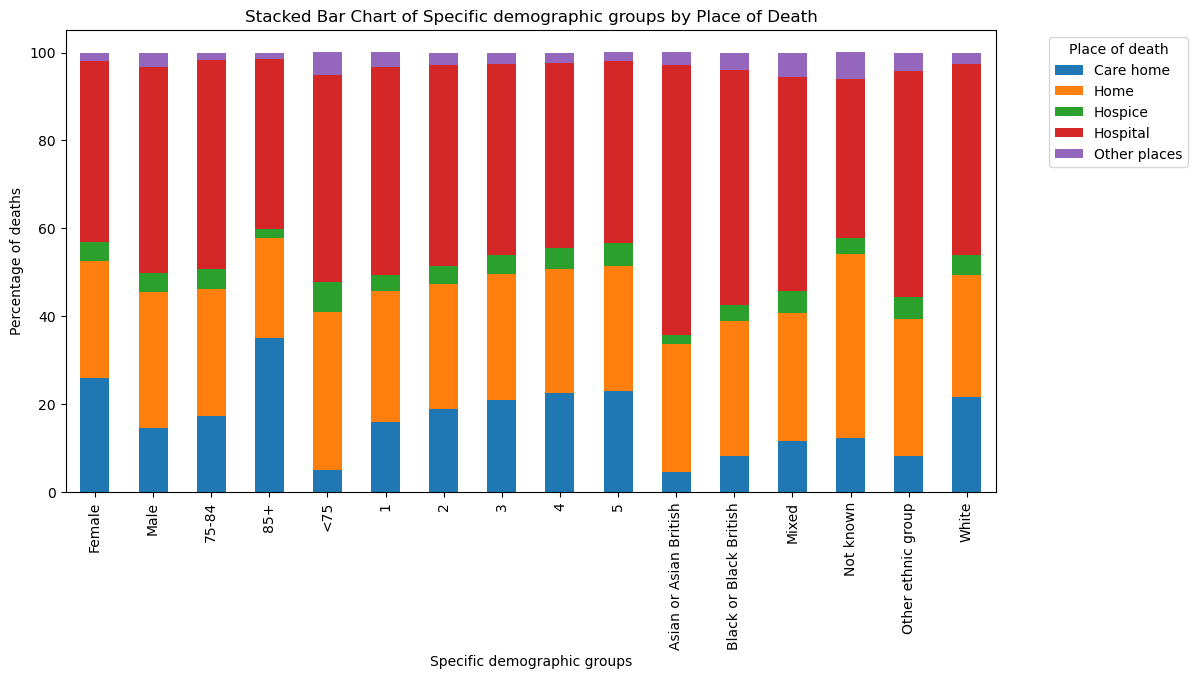

In [118]:
cleanplaceB = place[place['Specific demographic group'] != 'All']
demoorder = time[time['Specific demographic group'] != 'All']['Specific demographic group'].unique()

cleanplaceB['Specific demographic group'] = pd.Categorical(cleanplaceB['Specific demographic group'], categories=demoorder, ordered=True)

ax = cleanplaceB.pivot(index='Specific demographic group', columns='Place of death', values='Percentage of deaths in the cause of death / demographic category') \
       .plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Stacked Bar Chart of Specific demographic groups by Place of Death')
plt.xlabel('Specific demographic groups')
plt.ylabel('Percentage of deaths')

plt.legend(title='Place of death', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

The x-axis represents the specific demographic group, the y-axis represents the percentage of deaths, and different colours represent different places of death. 

In this graph, we can know the following information:

- Excluding "Other places", the proportion of deaths occurring in **Hospice was small for all demographic groups**.
- Focusing on gender, we can see that although both have the largest proportion of deaths in hospitals, in comparison, **women** have a higher proportion of deaths in **care homes** than men, while **men** have a higher proportion of deaths in **hospitals** than women.
- Focusing on age, we can see that the **older** you are, the more likely you are to die in the **care home**, and the **younger** you are, the more likely you are to die at **home** and in the **hospital**. The difference between the percentage of people over 85 and those under 75 who die in a care home is nearly **30%**, while the percentage of people died at home under 75 is significantly higher than those over 75.
- Focusing on deprivation, we can see that **the higher the grade**, the **higher** the proportion of deaths in the **care home**, the **lower** the proportion of deaths in **hospital**, and the proportion of deaths in **hospice** is **not very different**.
- Focusing on ethnic groups, we can see that **Asian or Asian British** has the highest proportion of deaths in **hospital**, while **Not known** has the highest proportion of deaths at **home**. In contrast, **whites** have the highest percentage of deaths in **care homes** of any ethnic group.

### Relationship

In the group work, I was responsible for analysing the relationship between the average length of hospitalisation and the other variables, so I chose two tables of all the data related to time (Table 4, Table 5) and one table related to place of death (Table 6). After a brief description of the data in the tables, I think I will be using mainly Table 4 and Table 6 for my analyses afterwards. 

Table 4 has both narrow underlying causes of death and specific demographic groups variables and has data to calculate the average length of hospitalisation. Using averages to compare with known statistics (25th percentile, median, 75th percentile, etc.) can find some information.

By using the variables "narrow underlying cause of death" and "specific demographic group" to combine Tables 4 and 6, it is possible to analyse the data on length of hospitalisation in relation to the data on place of death.

# Explore

### Question 1: Relationship Between Average Length Of Hospitalisation And Narrow Causes Of Death

In [119]:
def ave(row):
    if row['Time period before death'] == '3 months':
        return row['Average percentage of time spent in hospital (all deaths)'] * 0.91
    elif row['Time period before death'] == '6 months':
        return row['Average percentage of time spent in hospital (all deaths)'] * 1.83
    else:
        return row['Average percentage of time spent in hospital (all deaths)']

time['Average'] = time.apply(ave, axis=1)
time['Average'] = time['Average'].round(1)

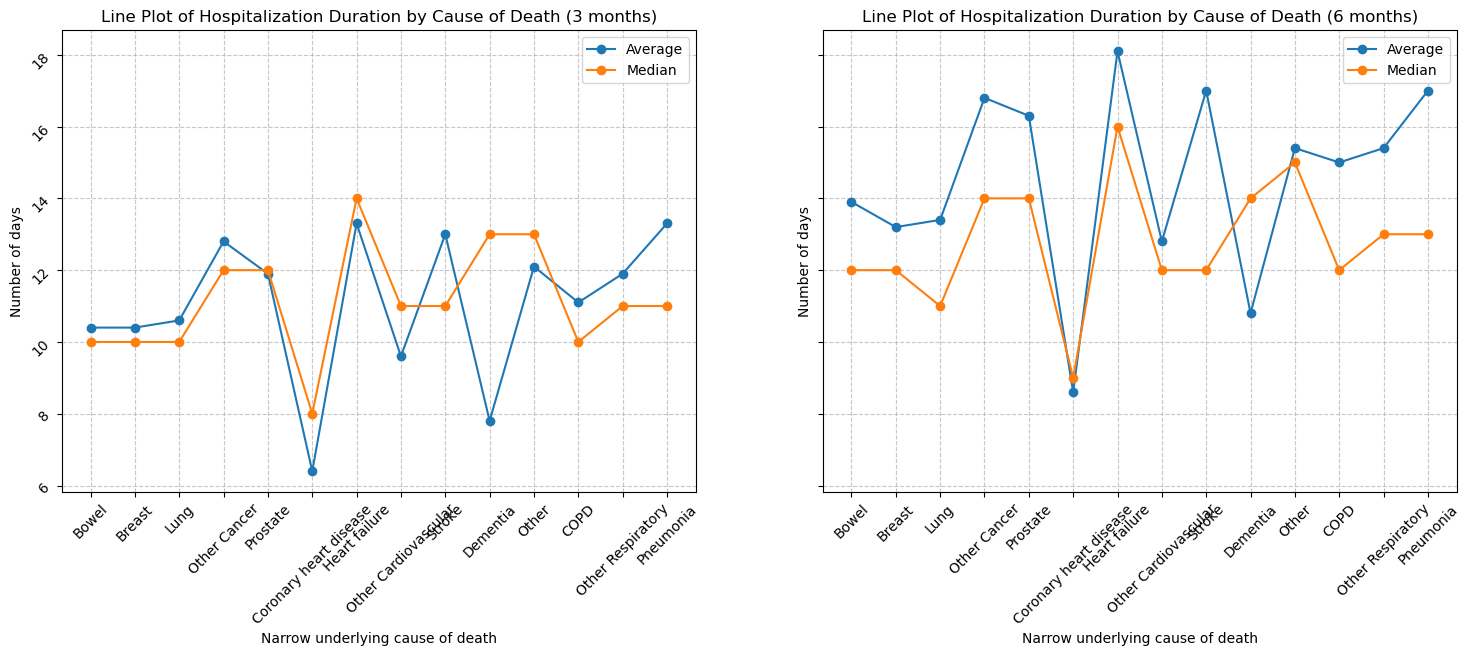

In [120]:
cleantimes = time[(time['Time period before death'] == '3 months') & (time['Narrow underlying cause of death'] != 'All')]

fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)  


axes[0].plot(cleantimes['Narrow underlying cause of death'], cleantimes['Average'], marker='o', linestyle='-', label='Average')
axes[0].plot(cleantimes['Narrow underlying cause of death'], cleantimes['Median'], marker='o', linestyle='-', label='Median')
axes[0].set_xticks(cleantimes['Narrow underlying cause of death']) 
axes[0].tick_params(rotation=45)
axes[0].set_title('Line Plot of Hospitalization Duration by Cause of Death (3 months)')
axes[0].set_xlabel('Narrow underlying cause of death')
axes[0].set_ylabel('Number of days')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend()


cleantimel = time[(time['Time period before death'] == '6 months') & (time['Narrow underlying cause of death'] != 'All')]
order = cleantimes['Narrow underlying cause of death'].unique()

cleantimel = cleantimel.set_index('Narrow underlying cause of death').loc[order].reset_index()


axes[1].plot(cleantimel['Narrow underlying cause of death'], cleantimel['Average'], marker='o', linestyle='-', label='Average')
axes[1].plot(cleantimel['Narrow underlying cause of death'], cleantimel['Median'], marker='o', linestyle='-', label='Median')
axes[1].set_xticks(cleantimel['Narrow underlying cause of death']) 
axes[1].tick_params(rotation=45)
axes[1].set_title('Line Plot of Hospitalization Duration by Cause of Death (6 months)')
axes[1].set_xlabel('Narrow underlying cause of death')
axes[1].set_ylabel('Number of days')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

plt.show()

The left graph shows the length of hospitalisation with different narrow underlying causes of death in the 3 months prior to death, and the right graph shows that 6 months prior to death. In both charts, the x-axis is narrow underlying cause of death, the y-axis is the number of days, the blue lines represent the mean number of days in hospital, and the orange lines represent the median number of days in hospital.

By comparing the two graphs, we can see that:

- In the right graph(6 months before death), the line representing the **mean** is **largely higher** than the line representing the **median** (with the exception of coronary heart disease). 
- However, in the left graph(3 months before death), the distance between the line representing the mean and the line representing the median becomes smaller and the **mean** is **smaller than the median** for **nearly half of the causes**. 
- It is worth noting that in the table on the left, the mean of **dementia** is very much smaller than the median.

This suggests that:

- In the six months before death, some of the **larger values** (perhaps extreme values or cases with prolonged hospitalisation) affected the overall mean, making it relatively high. 
- Whereas in the three months before death, the data were more **symmetrically distributed** or there were not as many extreme values for prolonged hospitalisation. 
- For some causes of death(*prostate, coronary heart disease, heart failure, other cardiovascular and especially dementia*), the distribution of patients' length of hospitalisation became more **concentrated** over shorter periods of time.


**Hypothesis 1: Cardiovascular diseases are prone to acute attacks leading to quicker death of the patient.**

### Question 2: Relationship Between Average Length Of Hospitalisation And Specific Demographic Group

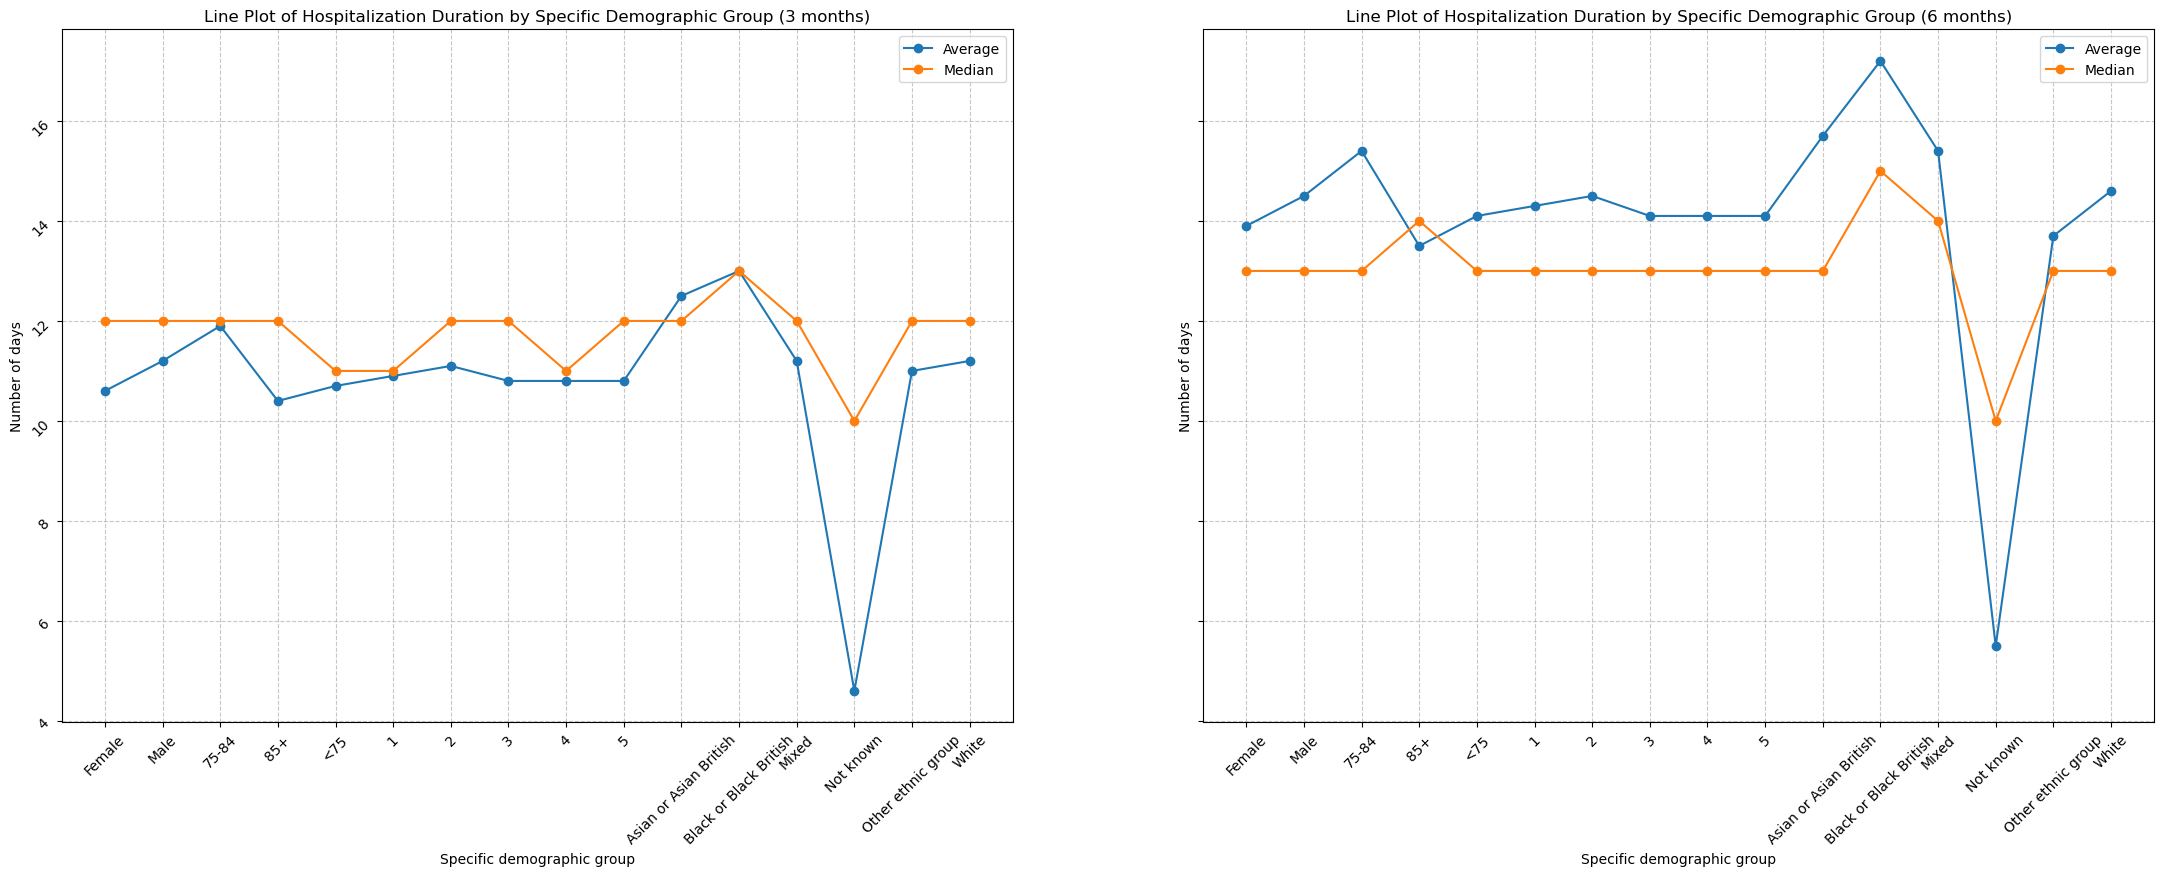

In [121]:
cleantimeS = time[(time['Time period before death'] == '3 months') & (time['Specific demographic group'] != 'All')]

fig, axes = plt.subplots(1, 2, figsize=(27, 9), sharey=True) 

axes[0].plot(cleantimeS['Specific demographic group'], cleantimeS['Average'], marker='o', linestyle='-', label='Average')
axes[0].plot(cleantimeS['Specific demographic group'], cleantimeS['Median'], marker='o', linestyle='-', label='Median')
axes[0].set_xticks(cleantimeS['Specific demographic group']) 
axes[0].tick_params(rotation=45)
axes[0].set_title('Line Plot of Hospitalization Duration by Specific Demographic Group (3 months)')
axes[0].set_xlabel('Specific demographic group')
axes[0].set_ylabel('Number of days')
axes[0].grid(True, linestyle='--', alpha=0.7)
axes[0].legend()

cleantimeL = time[(time['Time period before death'] == '6 months') & (time['Specific demographic group'] != 'All')]
orderB = cleantimeS['Specific demographic group'].unique()

cleantimeL = cleantimeL.set_index('Specific demographic group').loc[orderB].reset_index()

axes[1].plot(cleantimeL['Specific demographic group'], cleantimeL['Average'], marker='o', linestyle='-', label='Average')
axes[1].plot(cleantimeL['Specific demographic group'], cleantimeL['Median'], marker='o', linestyle='-', label='Median')
axes[1].set_xticks(cleantimeL['Specific demographic group']) 
axes[1].tick_params(rotation=45)
axes[1].set_title('Line Plot of Hospitalization Duration by Specific Demographic Group (6 months)')
axes[1].set_xlabel('Specific demographic group')
axes[1].set_ylabel('Number of days')
axes[1].grid(True, linestyle='--', alpha=0.7)
axes[1].legend()

plt.show()

The left graph shows the length of hospitalisation with different specific demographic groups in the 3 months prior to death, and the right graph shows that 6 months prior to death. In both charts, the x-axis is specific demographic group, the y-axis is the number of days, the blue lines represent the mean number of days in hospital, and the orange lines represent the median number of days in hospital.

By comparing the two graphs, we can see that:

- In the right graph(6 months before death), the line representing the **mean** is **largely higher** than the line representing the **median**. 
- However, in the left graph(3 months before death), the line representing the **median** is **largely higher** than the line representing the **mean**. 
- It appears that the differences in length of hospitalisation due to gender, age, and deprivation are small, with the largest differences stemming from **ethnic groups**.
- The data of the group **'Not known'** is especially strange.

This suggests that:

- In the relatively long time period before death (6 months), there may be some **extremes of longer hospital stays**. In contrast, over a relatively short time period (3 months), the mean was more strongly influenced by **shorter hospital stays**.
- Specific ethnic groups may have differences in **access to health care, disease conditions, or medical practices** that result in differences in length of hospitalisation.
- Strange data for the 'Not known' group may be due to problems with **data collection** or **recording**. **Further investigation** is required to determine the cause. This may involve a lack of detailed information on this group, or may be due to missing or incomplete data.

**Hypothesis 2: Non-white groups are less likely to have access to the ability to receive care outside of hospital.**

### Question 3: Relationship Between Average Length Of Hospitalisation And Place Of Death

In [122]:
cleanplaceA = place[place['Narrow underlying cause of death'] != 'All']

time3A = cleantimes[['Broad underlying cause of death', 'Narrow underlying cause of death', 'Average']]
place3A= cleanplaceA[['Broad underlying cause of death', 'Narrow underlying cause of death', 'Place of death', 'Number of death', 'Percentage of deaths in the cause of death / demographic category']]

mergedA = pd.merge(time3A, place3A, on=['Broad underlying cause of death','Narrow underlying cause of death'], how='outer')

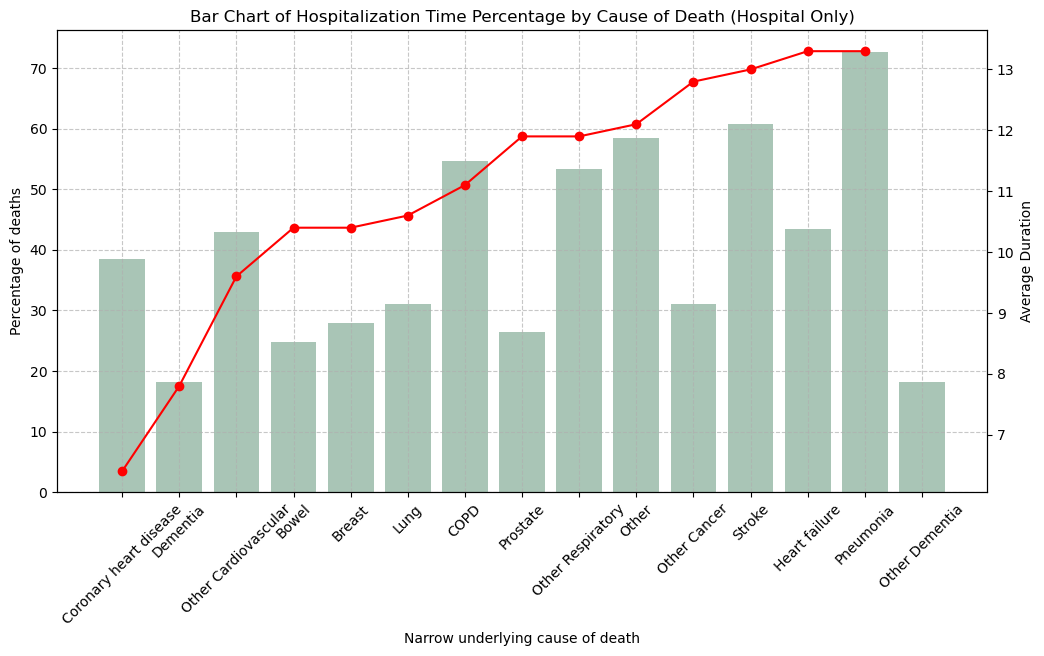

In [123]:
mergedA_sorted = mergedA[mergedA['Place of death'] == 'Hospital'].sort_values(by='Average')

plt.figure(figsize=(12, 6))

custom_colors = ['#a4cab6']

ax1 = sns.barplot(x='Narrow underlying cause of death', y='Percentage of deaths in the cause of death / demographic category', data=mergedA_sorted, color=custom_colors[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Bar Chart of Hospitalization Time Percentage by Cause of Death (Hospital Only)')
ax1.set_xlabel('Narrow underlying cause of death')
ax1.set_ylabel('Percentage of deaths')

ax2 = ax1.twinx()
ax2.plot(mergedA_sorted['Narrow underlying cause of death'], mergedA_sorted['Average'], marker='o', color='red', label='Average Duration')
ax2.set_ylabel('Average Duration')

ax1.grid(True, linestyle='--', alpha=0.7)

plt.show()


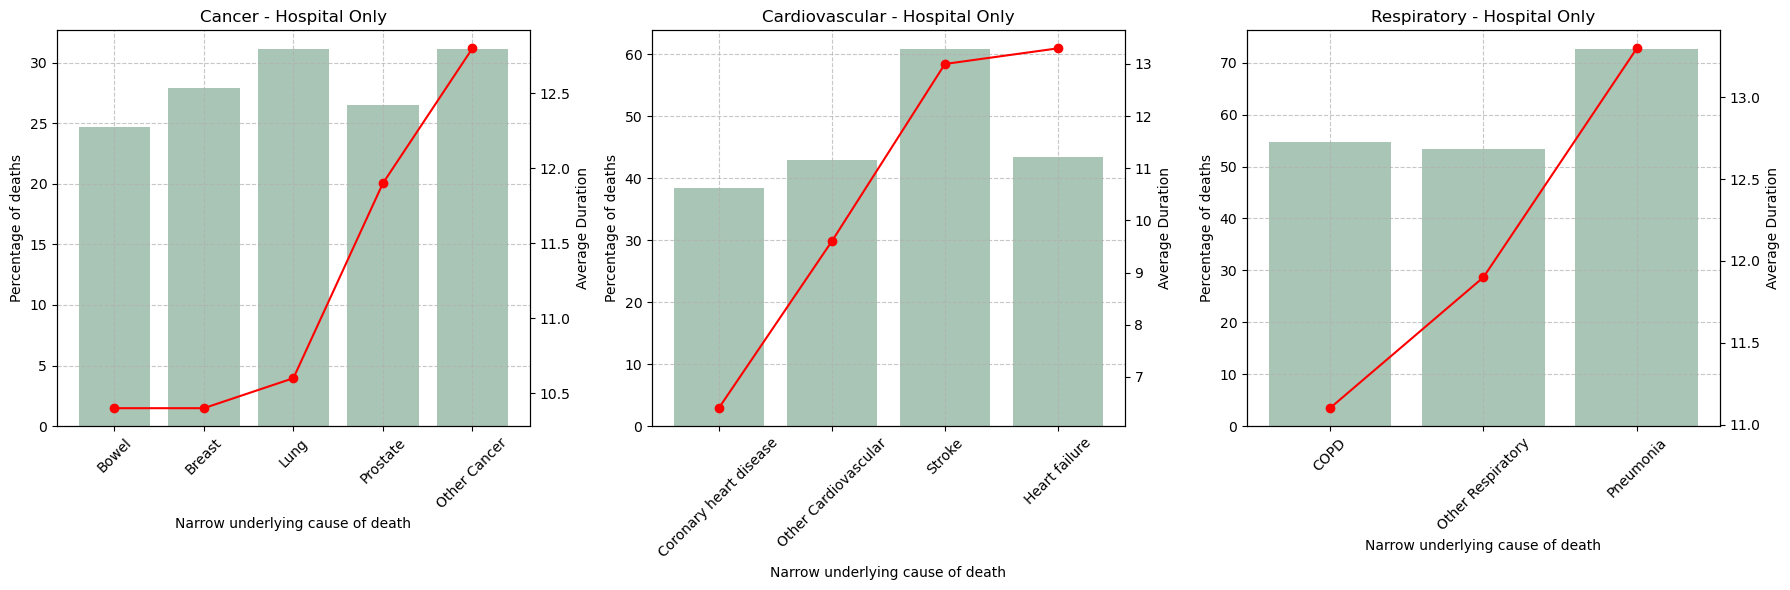

In [124]:
diseases = ['Cancer', 'Cardiovascular', 'Respiratory']

fig, axes = plt.subplots(1, len(diseases), figsize=(18, 6))

for i, disease in enumerate(diseases):
    
    TP = mergedA[(mergedA['Place of death'] == 'Hospital') & (mergedA['Broad underlying cause of death'] == disease)].sort_values(by='Average')
    
    ax1 = sns.barplot(x='Narrow underlying cause of death', y='Percentage of deaths in the cause of death / demographic category', data=TP, color=custom_colors[0], ax=axes[i])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_title(f'{disease} - Hospital Only')
    ax1.set_xlabel('Narrow underlying cause of death')
    ax1.set_ylabel('Percentage of deaths')

    ax2 = ax1.twinx()
    ax2.plot(TP['Narrow underlying cause of death'], TP['Average'], marker='o', color='red', label='Average Duration')
    ax2.set_ylabel('Average Duration')

    ax1.grid(True, linestyle='--', alpha=0.7)
    
plt.tight_layout()

plt.show()


Data on length of hospitalisation for 'Other Dementia' is missing from Table 4.

In this section, short-term (3 months prior to death) data were taken for all mean duration data.

In this graph, the x-axis is the narrow underlying cause of death, the left y-axis is the proportion of deaths, and the right y-axis is the number of days. The line graph indicates the average length of stay and the bar graph indicates the proportion of deaths in hospital. In addition, since Cancer,Cardiovascular and Respiratory contain more narrow underlying causes of death, I made separate graphs for each of these three categories.

We can see that:

- When classified by narrow underlying cause of death, it is difficult to say that there is a strict correlation between the average length of hospitalisation and the percentage of dying in hospital.
- However, as the average length of hospitalisation increases, **a proportion of deaths in hospital greater than 50% occurs**. The number of narrow underlying cause of death with this characteristic was higher when the average length of stay was greater than **11 days**.

This may mean that:

- Where the average length of stay was **longer**, patients were **more likely to die during hospitalisation**.
- Some **specific underlying causes of death** were more common in cases where the average length of stay was longer.

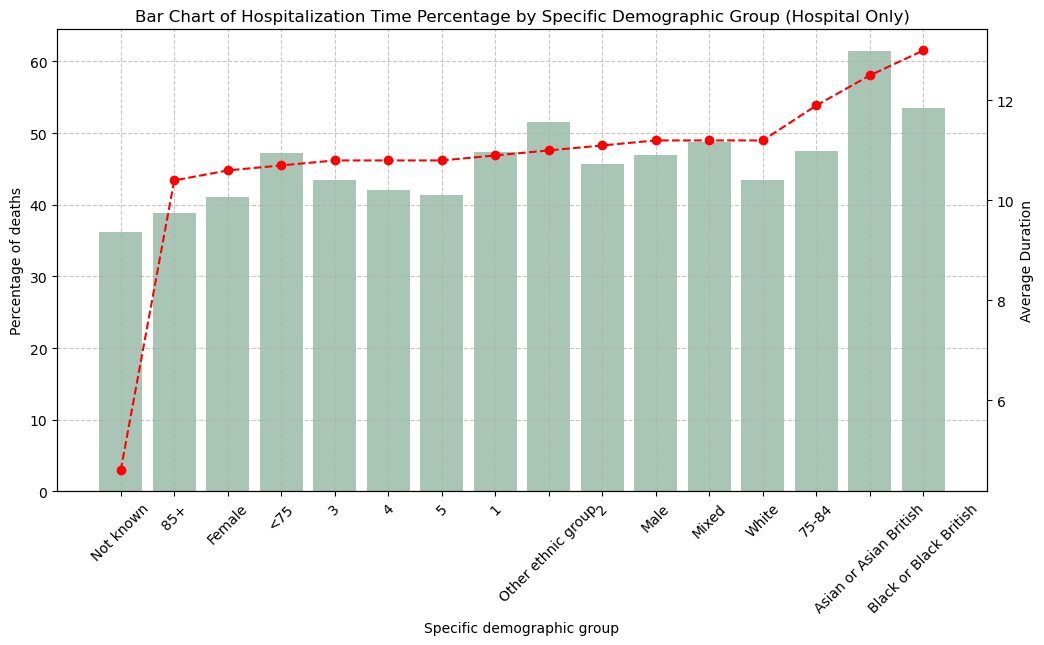

In [127]:
cleanplaceB = place[place['Specific demographic group'] != 'All']

time3B = cleantimeS[['Demographic category', 'Specific demographic group', 'Average']]
place3B = cleanplaceB[['Demographic category', 'Specific demographic group', 'Place of death', 'Number of death', 'Percentage of deaths in the cause of death / demographic category']]

mergedB = pd.merge(place3B, time3B, on=['Demographic category', 'Specific demographic group'], how='outer')
mergedB_filtered = mergedB[mergedB['Place of death'] == 'Hospital'].sort_values(by='Average')

plt.figure(figsize=(12, 6))

custom_colors = ['#a4cab6']

ax1 = sns.barplot(x='Specific demographic group', y='Percentage of deaths in the cause of death / demographic category', data=mergedB_filtered, color=custom_colors[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax1.set_title('Bar Chart of Hospitalization Time Percentage by Specific Demographic Group (Hospital Only)')
ax1.set_xlabel('Specific demographic group')
ax1.set_ylabel('Percentage of deaths')

ax2 = ax1.twinx()
ax2.plot(mergedB_filtered['Specific demographic group'], mergedB_filtered['Average'], linestyle='dashed', marker='o', color='red', label='Average Duration')
ax2.set_ylabel('Average Duration')

ax1.grid(True, linestyle='--', alpha=0.7)

plt.show()


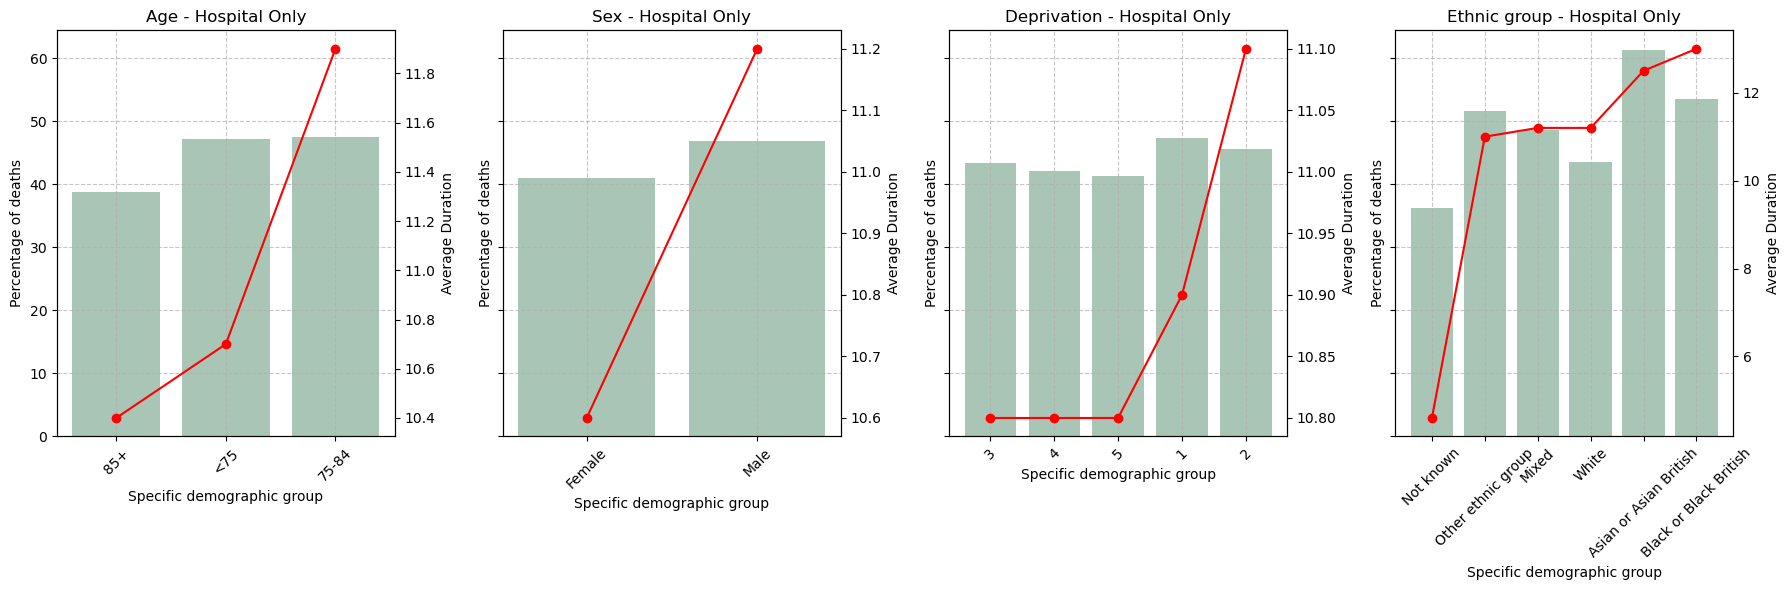

In [126]:
groups = ['Age', 'Sex', 'Deprivation','Ethnic group']

fig, axes = plt.subplots(1, len(groups), figsize=(18, 6), sharey=True)

for i, group in enumerate(groups):
    
    TP = mergedB[(mergedB['Place of death'] == 'Hospital') & (mergedB['Demographic category'] == group)].sort_values(by='Average')
    
    ax1 = sns.barplot(x='Specific demographic group', y='Percentage of deaths in the cause of death / demographic category', data=TP, color=custom_colors[0], ax=axes[i])
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
    ax1.set_title(f'{group} - Hospital Only')
    ax1.set_xlabel('Specific demographic group')
    ax1.set_ylabel('Percentage of deaths')

    ax2 = ax1.twinx()
    ax2.plot(TP['Specific demographic group'], TP['Average'], marker='o', color='red', label='Average Duration')
    ax2.set_ylabel('Average Duration')
    
    ax1.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()

plt.show()

In this graph, the x-axis is the specific demographic group, the left y-axis is the proportion of deaths, and the right y-axis is the number of days. The line graph indicates the average length of stay and the bar graph indicates the proportion of deaths in hospital. In addition, I made separate graphs for each demographic category(age, sex, deprivation, ethnic group).

We can see that:

- 'Not known' is still a strange data. Its average length of hospitalisation is extremely low.
- We can generally say that **the longer the average length of stay, the higher the proportion of deaths in hospital**.
- Across all demographic categories, **'Age'** and **'Sex'** showed a **positive correlation** between mean length of stay and proportion of deaths in hospital.
- The proportion of people dying in hospital fell as the deprivation index fell, and those with a high deprivation index also stayed in hospital longer on average. However, the overall difference is very small.
- **Asian or Asian British** have the highest rate of hospital deaths of any specific demographic group and the second highest average length of stay.

This may mean that:

- Where the average length of stay was longer, patients were more likely to die during hospitalisation.
- The significant trends demonstrated by the **Asian or Asian British** group may indicate that this group may experience **special health challenges** that result in long hospitalisation and a higher proportion of in-hospital deaths.

**Hypothesis 3: Asian or Asian British group may suffer from some special challenges that leading them to stay in hospitals for a longer time and cause higher proportion of in-hospital deaths.**

# Reflect and Hypotheses

### Reflect

The raw data are linked to a variety of statistics, including length of hospital stay, place of death, number of hospital admissions, etc., through the variables "underlying cause of death" and "demographic classification". This makes it easy to study the relationship of causes of death and demographic groups with other variables. However, the relative lack of data that can be linked to other variables (for example, we do not know the length of stay in hospitals for patients who died in hospitals for a narrow underlying cause of death) makes analyses in this area relatively weak.

The advantage of the data is that it is more comprehensive and clearly categorised. Data that has already been counted is very easy to work with, without really having to analyse more than half a million pieces of data. The data, which are broken down into longer and shorter time periods, allow for comparisons to be made and for differences in variables over time to be detected. However, there are some shortcomings in the data, such as the very strange "Not known" data and the relatively small sample size of non-white race statistics. These shortcomings may lead to discrepancies between the results of the analyses and the reality of the situation.

### Hypothesis 1

**The hypothesis:** Cardiovascular diseases are prone to acute attacks leading to quicker death of the patient.

**Why:** 
- In the statistics for the 6 months before death, the mean was greater than the median, but the average length of stay for all CVD patients in the 3 months before death was lower than their median length of stay. This means that a higher proportion of all CVD patients who were able to be admitted to hospital for emergency treatment had shorter hospital stays. This may be because the disease is progressing too quickly.

**How to test:**
- Hospital data support: including medical records, etc. Data on the rate of deterioration (e.g. number of resuscitations, time between a not yet dangerous state and death, etc.) would help to confirm this hypothesis.
- More data: whether the patients died from the last emergency admission.
- Investigating the wishes of relatives or the patient: If it is possible to find out whether the patient or family members have expressed a refusal of treatment or a choice to go home and wait for death, this can help to distinguish whether it is an active choice not to be treated in the hospital, rather than an acute attack.

### Hypothesis 2

**The hypothesis:** Non-white groups are less likely to have access to the ability to receive care outside of hospital.

**Why:**

- From the known data, it can be seen that the average length of hospitalisation is higher for all non-white groups than for white groups, excluding the 'Not known' group.
- Whites also have the lowest "proportion of deaths in hospital" of any ethnic group. At the same time, the white group dies in "care homes" at a higher rate than any other non-white group.
- Based on reality, I think it's hard to see the possibility that whites are poorer compared to other ethnic groups and can't afford to pay for hospital admissions.

**How to test:**

- More data: Prevalence of other health care services/facilities(especially care home), financial burden caused, etc. To analyse whether difficulties in accessing medical care and financial pressures have led to a greater tendency for non-white groups to be treated in hospitals for longer periods of time.
- Interviews and questionnaires: do non-white groups face more barriers to accessing healthcare?
- Further studies: Are there cultural factors that make non-white groups more trusting of hospital care? This can be done through literature research.

### Hypothesis 3

**The hypothesis:** Asian or Asian British group may suffer from some specific diseases that leading them to stay in hospitals for a longer time and cause higher proportion of in-hospital deaths.

**Why:**

- The data shows that Asian or Asian British have the highest rate of hospital deaths of any specific demographic group and the second highest average length of stay. The particularly high rate of hospital deaths after a long stay in this group leads me to speculate that it may be due to the fact that this group is more prone to diseases that require long stay in  hospital for observation.

**How to test:**

- Further study: Check that whether this group is more likely to suffer from diseases that, on average, result in longer hospital stays and more in-hospital deaths. Investigate the prevalence of specific diseases and their severity in the group to determine if there are some features that differ from the other ethnic groups.
- Further study: Based on known data, it is known that there are a number of narrow underlying causes of death that are characterised by a longer average length of hospitalisation and a higher mortality rate in hospital. Investigate the proportion of patients with these diseases among Asian or Asian British patients and check whether there are significant differences with other demographic groups.